<a href="https://colab.research.google.com/github/shanks98/small-script/blob/main/XML_Extractor_for_Data_Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Securonix-Automation-Script

Securonix-Automation-Script The provided Python script reads an XML file, extracts specific fields, and allows the user to export the data to either CSV or JSON format. Here’s a detailed breakdown of the code, followed by the dependencies needed to run it.

Code Explanation

Imports:

xml.etree.ElementTree as ET: Used for parsing XML files.
pandas as pd: A library for data manipulation and analysis, particularly useful for working with structured data.
json: Used to serialize data to JSON format.
os: Provides a way to use operating system-dependent functionality, like checking file existence.
Function Definitions:

parse_xml(file_path): Parses the XML file at file_path and returns the root element.
get_fields(root):
Collects all unique attribute names from ingesterSchedulerBean elements and keys from entry elements within the XML structure.
Returns a list of these fields.
extract_data(root, fields):
Iterates over ingesterSchedulerBean elements to extract data based on the specified fields. It captures both attributes and values from params entries.
Returns a list of dictionaries where each dictionary corresponds to a ingesterSchedulerBean element.
export_to_csv(data, filename): Converts the list of dictionaries into a pandas DataFrame and exports it to a CSV file.
export_to_json(data, filename): Writes the list of dictionaries to a JSON file with pretty formatting.
Main Logic:

Prompts the user for the path to an XML file and checks if it exists.
Parses the XML file to get the root element and retrieves the fields available in the XML.
Asks the user to select which fields to extract by providing indices.
Extracts the selected data and prompts for the desired export format (CSV or JSON).
Calls the appropriate export function based on the user's choice.
Execution:

The script runs the main() function when executed directly.
Dependencies

To run this script, you need to install the following Python packages:

pandas: For data manipulation and CSV export.
pip install pandas
The xml.etree.ElementTree, json, and os libraries are part of the Python standard library, so you don’t need to install them separately.

Summary

In summary, this script is useful for extracting and exporting data from XML files. Make sure you have Python installed along with the pandas library to execute it successfully.

Adding image for example:image

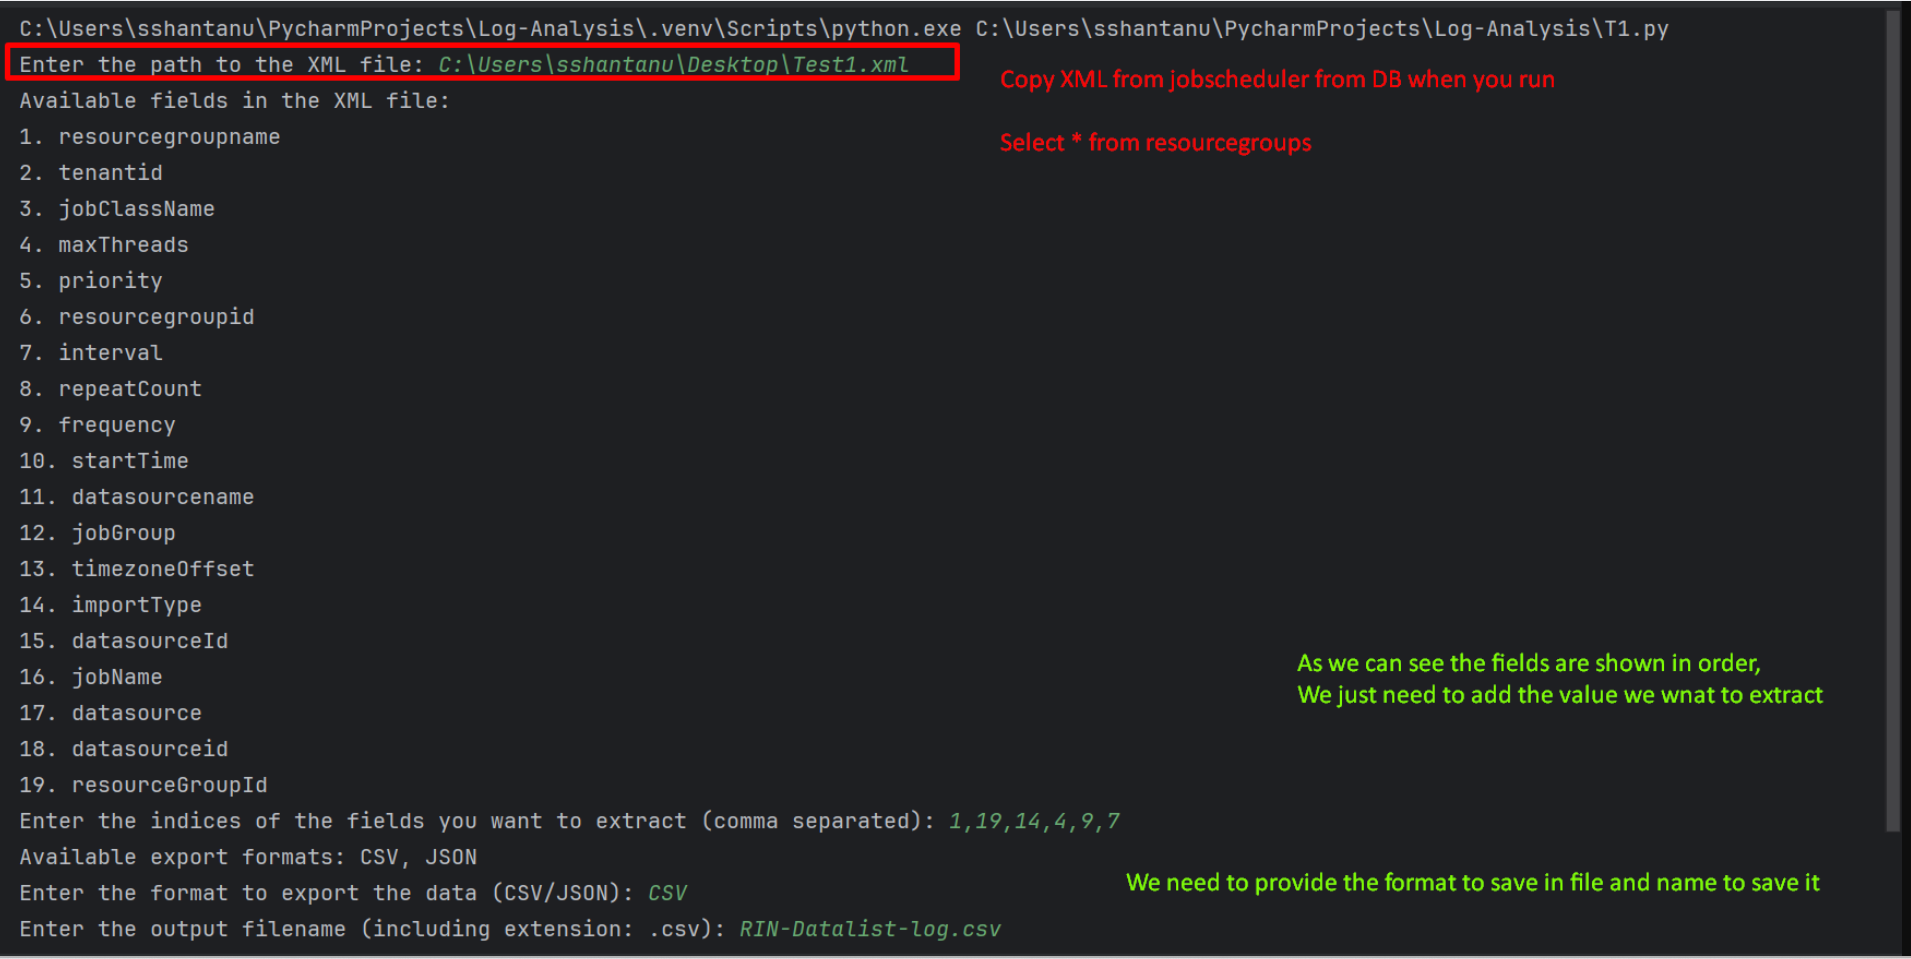

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import json
import os

def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    return root

def get_fields(root):
    fields = set()
    # Add attributes from 'ingesterSchedulerBean'
    for bean in root.findall('.//ingesterSchedulerBean'):
        fields.update(bean.attrib.keys())
    # Add keys from 'params' entries
    for entry in root.findall('.//entry'):
        key = entry.find("key")
        if key is not None:
            fields.add(key.text)
    # Sort fields alphabetically
    return sorted(list(fields))

def extract_data(root, fields):
    data = []
    for bean in root.findall('.//ingesterSchedulerBean'):
        bean_data = {attr: bean.attrib.get(attr, '') for attr in bean.attrib}
        params = bean.find('params')
        if params is not None:
            for entry in params.findall('entry'):
                key_elem = entry.find('key')
                value_elem = entry.find('value')
                if key_elem is not None and value_elem is not None and key_elem.text in fields:
                    bean_data[key_elem.text] = value_elem.text
        data.append(bean_data)
    return data

def export_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def export_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

def main():
    file_path = input("Enter the path to the XML file: ")

    if not os.path.exists(file_path):
        print("File does not exist.")
        return

    root = parse_xml(file_path)

    fields = get_fields(root)
    print("Available fields in the XML file (sorted alphabetically):")
    for idx, field in enumerate(fields, start=1):
        print(f"{idx}. {field}")

    while True:
        field_indices = input("Enter the indices of the fields you want to extract (comma separated): ")
        try:
            field_indices = [int(i) - 1 for i in field_indices.split(',')]
            if any(i < 0 or i >= len(fields) for i in field_indices):
                raise ValueError("One or more indices are out of range.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please enter valid indices.")

    selected_fields = [fields[i] for i in field_indices]

    data = extract_data(root, selected_fields)

    print("Available export formats: CSV, JSON")
    while True:
        export_format = input("Enter the format to export the data (CSV/JSON): ").strip().upper()
        if export_format not in ["CSV", "JSON"]:
            print("Unsupported format. Please enter either CSV or JSON.")
        else:
            break

    output_filename = input(f"Enter the output filename (including extension: .{export_format.lower()}): ")

    if export_format == "CSV":
        export_to_csv(data, output_filename)
    elif export_format == "JSON":
        export_to_json(data, output_filename)

    print(f"Data exported to {output_filename}")

if __name__ == "__main__":
    main()